# Balanced Tree Clothing Co.


## High Level Sales Analysis


In [24]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(r"C:\Users\Sam\Downloads\sales (1).csv",index_col=0)
df1= pd.read_csv(r'C:\Users\Sam\Downloads\product_prices.csv', index_col=0)
df2= pd.read_csv(r"C:\Users\Sam\Downloads\product_hierarchy.csv", index_col=0)
df3= pd.read_csv(r"C:\Users\Sam\Downloads\product_details.csv",index_col=0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15095 entries, 0 to 15094
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prod_id         15095 non-null  object
 1   qty             15095 non-null  int64 
 2   price           15095 non-null  int64 
 3   discount        15095 non-null  int64 
 4   member          15095 non-null  object
 5   txn_id          15095 non-null  object
 6   start_txn_time  15095 non-null  object
dtypes: int64(3), object(4)
memory usage: 943.4+ KB


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12 non-null     int64 
 1   product_id  12 non-null     object
 2   price       12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 384.0+ bytes


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          18 non-null     int64  
 1   parent_id   16 non-null     float64
 2   level_text  18 non-null     object 
 3   level_name  18 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 720.0+ bytes


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     12 non-null     object
 1   price          12 non-null     int64 
 2   product_name   12 non-null     object
 3   category_id    12 non-null     int64 
 4   segment_id     12 non-null     int64 
 5   style_id       12 non-null     int64 
 6   category_name  12 non-null     object
 7   segment_name   12 non-null     object
 8   style_name     12 non-null     object
dtypes: int64(4), object(5)
memory usage: 960.0+ bytes


### 1. What was the total quantity sold for all products?

In [30]:
total_sold = df['qty'].sum()
total_sold

45216

* Total quantity sold for all products is 45216

### 2. What is the total generated revenue for all products before discounts?.

In [31]:
total_revenue=(df['qty']*df['price']).sum()
total_revenue

1289453

* total generated revenue for all products before discounts is 12,89,453

### 3.What was the total discount amount for all products?

In [32]:
total_discount = (df['discount']/100.0 * df['qty'] * df['price']).sum()
total_discount

156229.14

In [33]:
total_revenue-total_discount#this wll be the provided discount

1133223.8599999999

## Transaction Analysis

### 1.How many unique transactions were there?

In [34]:
df['txn_id'].nunique()

2500

#### There are 2,500 unique transactions

### 2.What is the average unique products purchased in each transaction?

In [35]:
df.groupby('txn_id')['prod_id'].nunique().mean()

6.038

#### The average unique products purchased in each transaction is 6.038

### 3. What are the 25th, 50th and 75th percentile values for the revenue per transaction?

In [36]:
df['revenue'] = df['qty'] * df['price']
df

,prod_id,qty,price,discount,member,txn_id,start_txn_time,revenue
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296,52
1,5d267b,4,40,17,t,54f307,2021-02-13 01:59:43.296,160
2,b9a74d,4,17,17,t,54f307,2021-02-13 01:59:43.296,68
3,2feb6b,2,29,17,t,54f307,2021-02-13 01:59:43.296,58
4,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.3456,65
...,...,...,...,...,...,...,...,...
15090,9ec847,1,54,13,t,f15ab3,2021-03-20 12:01:22.944,54
15091,2a2353,3,57,13,t,f15ab3,2021-03-20 12:01:22.944,171
15092,e83aa3,5,32,1,t,93620b,2021-03-01 07:11:24.6624,160
15093,d5e9a6,2,23,1,t,93620b,2021-03-01 07:11:24.6624,46


In [37]:
percentiles = df.groupby('txn_id')['revenue'].sum().describe(percentiles=[.25, .5, .75])
percentiles

count    2500.000000
mean      515.781200
std       200.728371
min        26.000000
25%       375.750000
50%       509.500000
75%       647.000000
max      1224.000000
Name: revenue, dtype: float64

### 4.What is the average discount value per transaction?

In [51]:
adpt = df.groupby('txn_id')['discount'].mean().mean()
adpt

12.0904

In [52]:
# creating temperory data frame
temp_df = df.groupby('txn_id').apply(lambda x: (x['qty'] * x['price'] * x['discount'] / 100.0).sum()).reset_index(name='total_discount')

# Calculate the average of 'total_discount' from the temporary DataFrame
avg_discount_per_transaction = temp_df['total_discount'].mean()
avg_discount_per_transaction

62.491656000000006

In [53]:
avg_discount_per_transaction = temp_df['total_discount'].mean()
avg_discount_per_transaction

62.491656000000006

### 5.What is the percentage split of all transactions for members vs non-members?

In [54]:
df['member'].value_counts()

member
t    9061
f    6034
Name: count, dtype: int64

In [57]:
# Calculate the total number of transactions made by members
total_member_transactions = df[df['member'] == 't'].shape[0]

# Calculate the total number of transactions
total_transactions = len(df)

# Calculate the percentage of transactions made by members
percentage_member_transactions = (total_member_transactions / total_transactions) * 100

# Display the result
print("Percentage of Transactions Made by Members: {:.2f}%".format(percentage_member_transactions))


Percentage of Transactions Made by Members: 60.03%


In [58]:
# Calculate the total number of transactions made by members
total_member_transactions = df[df['member'] == 't'].shape[0]

# Calculate the total number of transactions
total_transactions = len(df)

# Calculate the total number of transactions made by non-members
total_non_member_transactions = total_transactions - total_member_transactions

# Calculate the percentage of transactions made by non-members
percentage_non_member_transactions = (total_non_member_transactions / total_transactions) * 100

# Display the result
print("Percentage of Transactions Made by Non-Members: {:.2f}%".format(percentage_non_member_transactions))


Percentage of Transactions Made by Non-Members: 39.97%


<BarContainer object of 2 artists>

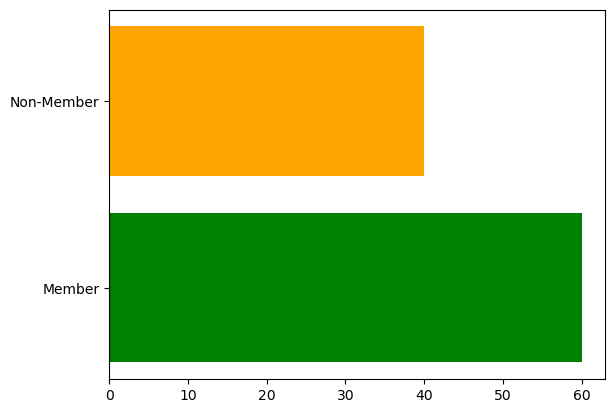

In [70]:
plt.barh(['Member', 'Non-Member'], [percentage_member_transactions, percentage_non_member_transactions], color=['green', 'orange'])
#visualization

### 6.What is the average revenue for member transactions and non-member transactions?

In [71]:
avg_revenue_member = df[df['member'] == 't']['revenue'].mean()# average revenue for member transactions
avg_revenue_member

85.75035868005739

In [72]:
avg_revenue_non_member = df[df['member'] == 'f']['revenue'].mean()# average revenue for non-member transactions
avg_revenue_non_member

84.9302287040106

In [73]:
df.groupby('member')['revenue'].mean()

member
f    84.930229
t    85.750359
Name: revenue, dtype: float64

<BarContainer object of 2 artists>

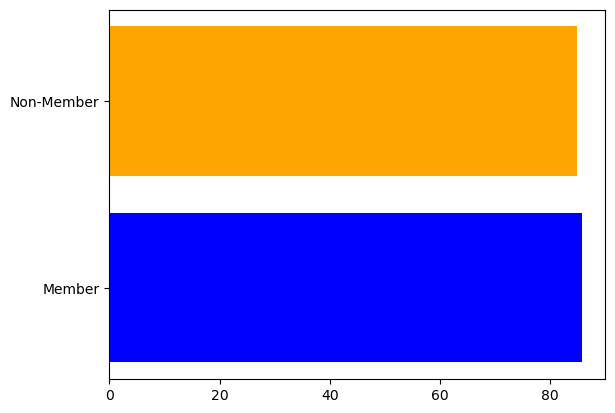

In [76]:
#visualizations
plt.barh(['Member', 'Non-Member'], [avg_revenue_member, avg_revenue_non_member], color=['blue', 'orange'])


# Product Analysis

### 1. What are the top 3 products by total revenue before discount?

In [79]:
df['total_revenue_before_discount'] = df['qty'] * df['price']# Calculate total revenue for each product before discount
product_revenue = df.groupby('prod_id')['total_revenue_before_discount'].sum()# Group by product ID and sum the total revenue
print("Top 3 Products by Total Revenue Before Discount:")# Display the top 3 products
print(top_3_products)

Top 3 Products by Total Revenue Before Discount:
prod_id
2a2353    217683
9ec847    209304
5d267b    152000
Name: total_revenue_before_discount, dtype: int64


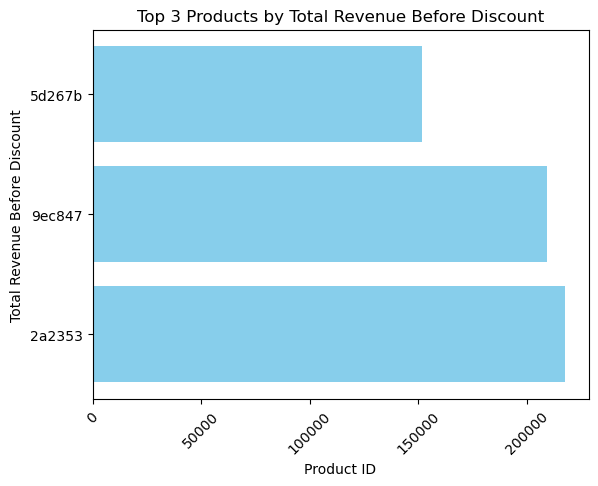

In [86]:
#visualizations
top_3_products = product_revenue.nlargest(3)

# Create a bar plot
plt.barh(top_3_products.index, top_3_products.values, color='skyblue')

# Add labels and title
plt.xlabel('Product ID')
plt.ylabel('Total Revenue Before Discount')
plt.title('Top 3 Products by Total Revenue Before Discount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


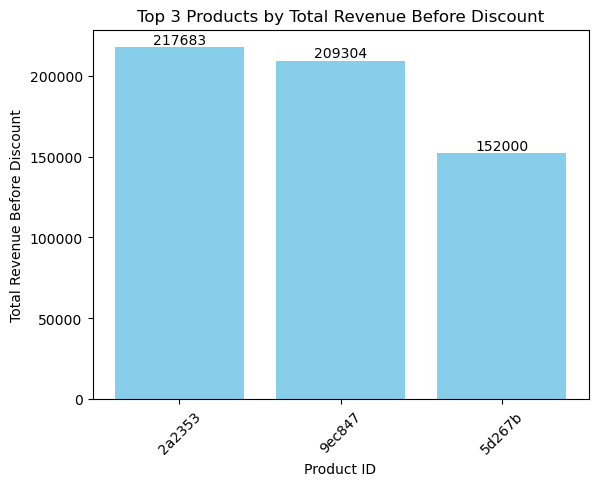

In [90]:
#visualizations
top_3_products = product_revenue.nlargest(3)

# Create a bar plot
plt.bar(top_3_products.index, top_3_products.values, color='skyblue')

# Add labels and title
plt.xlabel('Product ID')
plt.ylabel('Total Revenue Before Discount')
plt.title('Top 3 Products by Total Revenue Before Discount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add revenue values on top of the bars
for i, revenue in enumerate(top_3_products.values):
    plt.text(i, revenue, str(revenue), ha='center', va='bottom')

# Show the plot
plt.show()

### 2.What is the total quantity, revenue and discount for each segment?

In [98]:
merged_df = pd.merge(df,df3, left_on=['prod_id'],right_on=['product_id'], how = 'inner')
merged_df

,prod_id,qty,price_x,discount,member,txn_id,start_txn_time,revenue,total_revenue_before_discount,product_id,price_y,product_name,category_id,segment_id,style_id,category_name,segment_name,style_name
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296,52,52,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
1,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.3456,65,65,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
2,c4a632,1,13,21,f,ef648d,2021-01-27 02:18:17.1648,13,13,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
3,c4a632,2,13,23,t,fba96f,2021-03-03 00:32:56.0544,26,26,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
4,c4a632,5,13,11,t,4e9268,2021-01-23 14:18:54.0576,65,65,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15090,c8d436,1,10,20,t,359542,2021-03-02 07:12:38.88,10,10,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up
15091,c8d436,2,10,13,f,f905a2,2021-03-07 19:15:40.2336,20,20,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up
15092,c8d436,1,10,6,t,ba59c1,2021-02-08 12:26:55.5072,10,10,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up
15093,c8d436,3,10,12,f,15cfae,2021-02-09 22:01:44.6592,30,30,c8d436,10,Teal Button Up Shirt - Mens,2,5,14,Mens,Shirt,Teal Button Up


In [100]:
merged_df['revenue'] = merged_df['qty'] * merged_df['price_x']
merged_df['discount_value'] = merged_df['qty'] * merged_df['price_x'] * merged_df['discount'] / 100.0
segment_totals = merged_df.groupby('segment_name').agg({
    'qty': 'sum',
    'revenue': 'sum',
    'discount_value': 'sum'}).reset_index()
segment_totals


,segment_name,qty,revenue,discount_value
0,Jacket,11385,366983,44277.46
1,Jeans,11349,208350,25343.97
2,Shirt,11265,406143,49594.27
3,Socks,11217,307977,37013.44


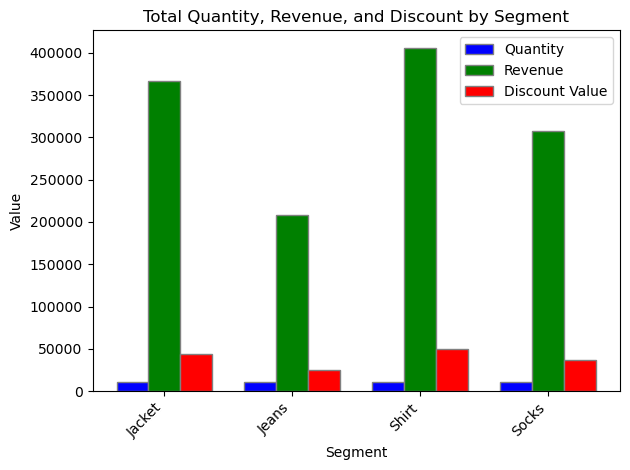

In [101]:
#visualization
import matplotlib.pyplot as plt

# Extract data for plotting
segments = segment_totals['segment_name']
quantities = segment_totals['qty']
revenues = segment_totals['revenue']
discounts = segment_totals['discount_value']

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(segments))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the bars
ax.bar(r1, quantities, color='b', width=bar_width, edgecolor='grey', label='Quantity')
ax.bar(r2, revenues, color='g', width=bar_width, edgecolor='grey', label='Revenue')
ax.bar(r3, discounts, color='r', width=bar_width, edgecolor='grey', label='Discount Value')

# Add labels, title, and ticks
ax.set_xlabel('Segment')
ax.set_ylabel('Value')
ax.set_title('Total Quantity, Revenue, and Discount by Segment')
ax.set_xticks([r + bar_width for r in range(len(segments))])
ax.set_xticklabels(segments)
ax.legend()

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.What is the top selling product for each segment?

In [103]:
merged_df['total_revenue_before_discounts'] = merged_df['qty'] * merged_df['price_x']
# Sort the DataFrame by segment_name and total_revenue_before_discounts in descending order
sorted_df = merged_df.sort_values(['segment_name', 'total_revenue_before_discounts'], ascending=[True, False])
# Drop duplicates, keeping the first occurrence (which is the max total_revenue_before_discounts)
top_selling_products = sorted_df.drop_duplicates(['segment_name', 'product_id']).reset_index(drop=True)
top_selling_products = top_selling_products[['segment_name', 'product_id', 'total_revenue_before_discounts']]
top_selling_products

,segment_name,product_id,total_revenue_before_discounts
0,Jacket,9ec847,270
1,Jacket,d5e9a6,115
2,Jacket,72f5d4,95
3,Jeans,e83aa3,160
4,Jeans,c4a632,65
5,Jeans,e31d39,50
6,Shirt,2a2353,285
7,Shirt,5d267b,200
8,Shirt,c8d436,50
9,Socks,f084eb,180


In [104]:
import pandas as pd

# Assuming 'merged_df' is your DataFrame with the provided columns
merged_df['total_revenue_before_discounts'] = merged_df['qty'] * merged_df['price_x']

# Group by 'segment_name' and find the index of the maximum total_revenue_before_discounts in each group
idx_max_revenue = merged_df.groupby('segment_name')['total_revenue_before_discounts'].idxmax()

# Use the index to get the corresponding rows from the original DataFrame
top_selling_products = merged_df.loc[idx_max_revenue, ['segment_name', 'product_id', 'total_revenue_before_discounts']].reset_index(drop=True)

print(top_selling_products)

  segment_name product_id  total_revenue_before_discounts
0       Jacket     9ec847                             270
1        Jeans     e83aa3                             160
2        Shirt     2a2353                             285
3        Socks     f084eb                             180


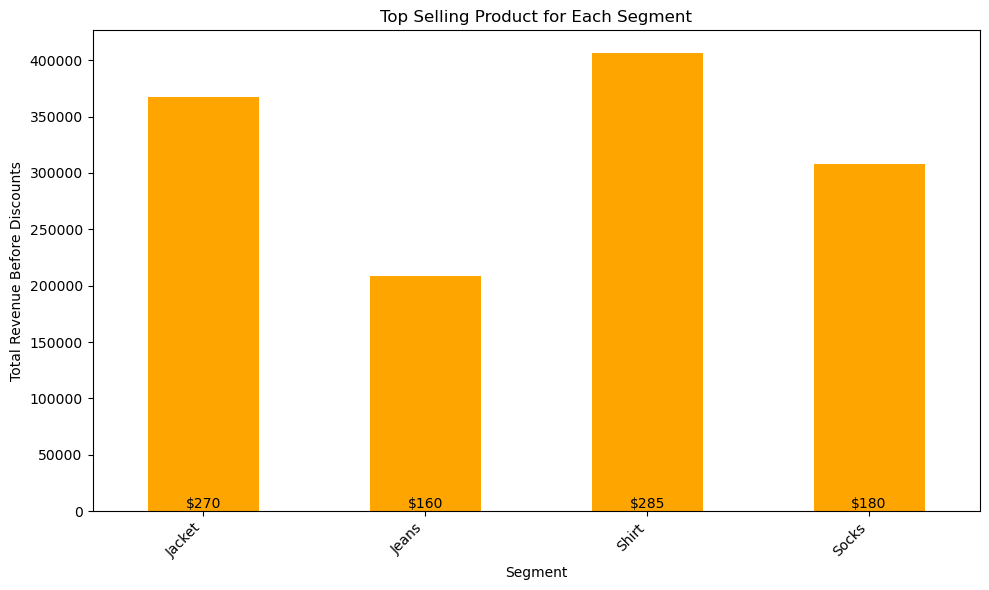

In [109]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total revenue before discounts for each segment
merged_df.groupby('segment_name')['total_revenue_before_discounts'].sum().plot(kind='bar', color='orange', ax=ax)

# Highlight the top-selling products by segment
for segment, idx in idx_max_revenue.items():
    ax.bar(segment, merged_df.loc[idx, 'total_revenue_before_discounts'], color='orange')

# Add labels and title
ax.set_xlabel('Segment')
ax.set_ylabel('Total Revenue Before Discounts')
ax.set_title('Top Selling Product for Each Segment')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add revenue values on top of the bars
for segment, idx in idx_max_revenue.items():
    revenue = merged_df.loc[idx, 'total_revenue_before_discounts']
    ax.text(segment, revenue, f"${revenue}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


### 4.What is the total quantity, revenue and discount for each category?

In [110]:
category_totals = merged_df.groupby('category_name').agg({
    'qty': 'sum',
    'revenue': 'sum',
    'discount_value': 'sum'
}).reset_index()

print(category_totals)


  category_name    qty  revenue  discount_value
0          Mens  22482   714120        86607.71
1        Womens  22734   575333        69621.43


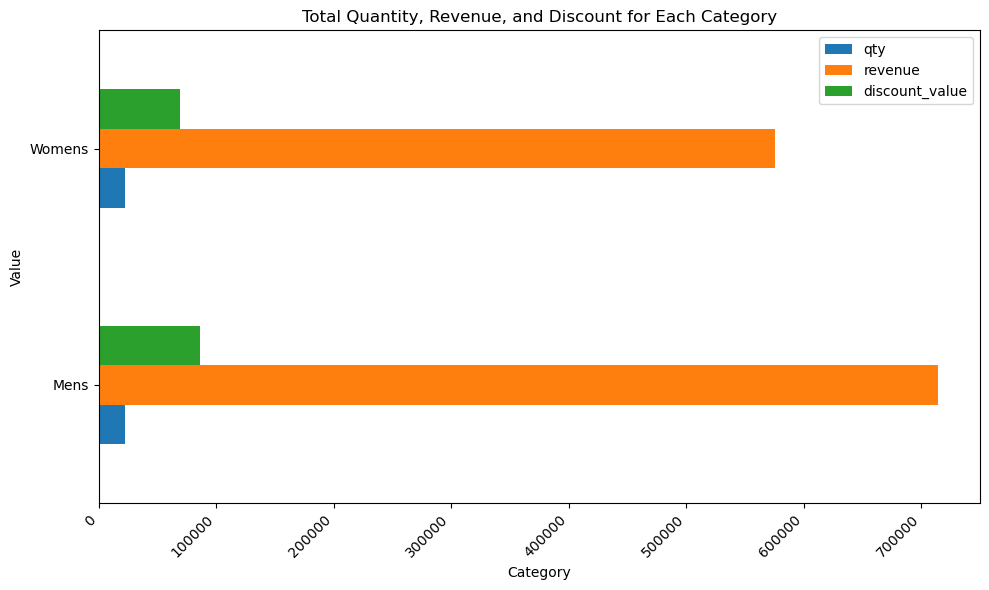

In [112]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total quantity, revenue, and discount for each category
category_totals.plot(kind='barh', x='category_name', y=['qty', 'revenue', 'discount_value'], ax=ax)

# Add labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Total Quantity, Revenue, and Discount for Each Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### 5.What is the top selling product for each category?

In [113]:
product_totals = merged_df.groupby(['category_name', 'product_id']).agg({
    'total_revenue_before_discounts': 'sum'}).reset_index()

# Find the top-selling product for each category
top_selling_products = product_totals.groupby('category_name').apply(lambda x: x.loc[x['total_revenue_before_discounts'].idxmax()]).reset_index(drop=True)

print(top_selling_products[['category_name', 'product_id', 'total_revenue_before_discounts']])


  category_name product_id  total_revenue_before_discounts
0          Mens     2a2353                          217683
1        Womens     9ec847                          209304


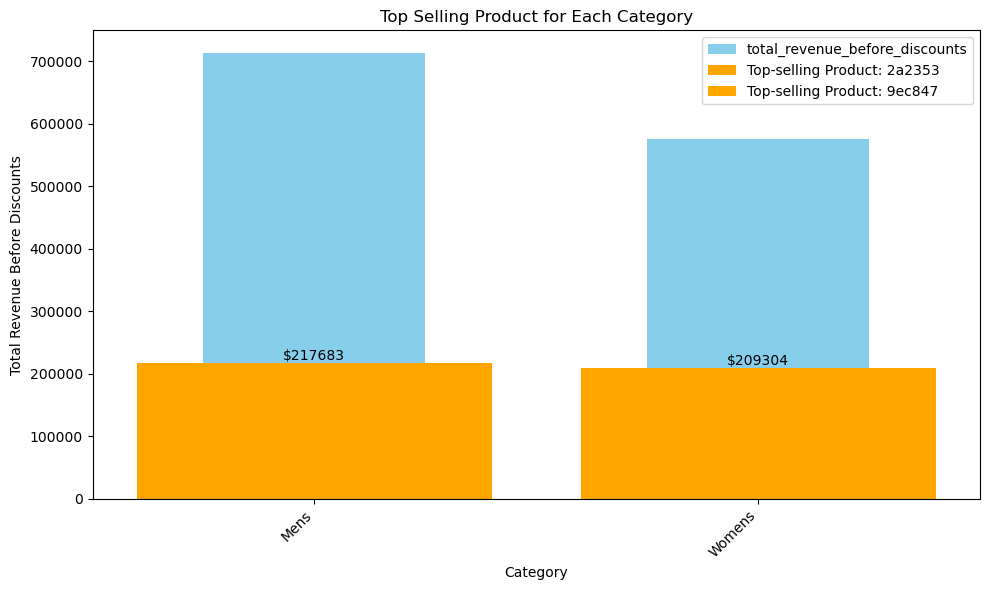

In [116]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total revenue before discounts for each category
merged_df.groupby('category_name')['total_revenue_before_discounts'].sum().plot(kind='bar', color='skyblue', ax=ax)

# Highlight the top-selling products by category and add labels
for idx, row in top_selling_products.iterrows():
    ax.bar(row['category_name'], row['total_revenue_before_discounts'], color='orange', label=f'Top-selling Product: {row["product_id"]}')
    ax.text(row['category_name'], row['total_revenue_before_discounts'], f"${row['total_revenue_before_discounts']}", ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Total Revenue Before Discounts')
ax.set_title('Top Selling Product for Each Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()



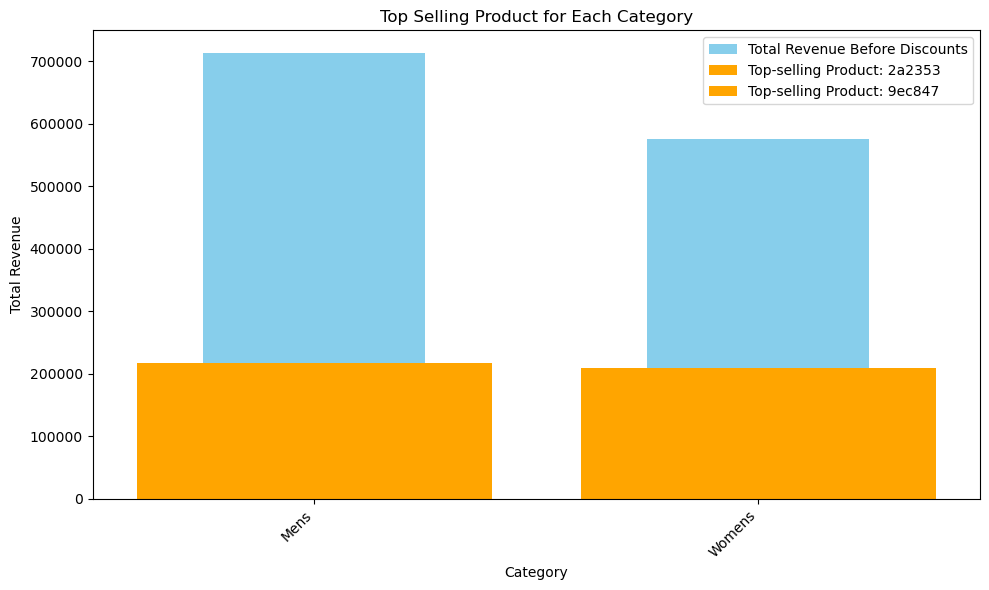

In [117]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total revenue before discounts for each category
category_totals = merged_df.groupby('category_name')['total_revenue_before_discounts'].sum()
category_totals.plot(kind='bar', color='skyblue', ax=ax, label='Total Revenue Before Discounts')

# Plot the total revenue of the top-selling product for each category
for idx, row in top_selling_products.iterrows():
    ax.bar(row['category_name'], row['total_revenue_before_discounts'], color='orange', label=f'Top-selling Product: {row["product_id"]}')

# Add labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Total Revenue')
ax.set_title('Top Selling Product for Each Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()


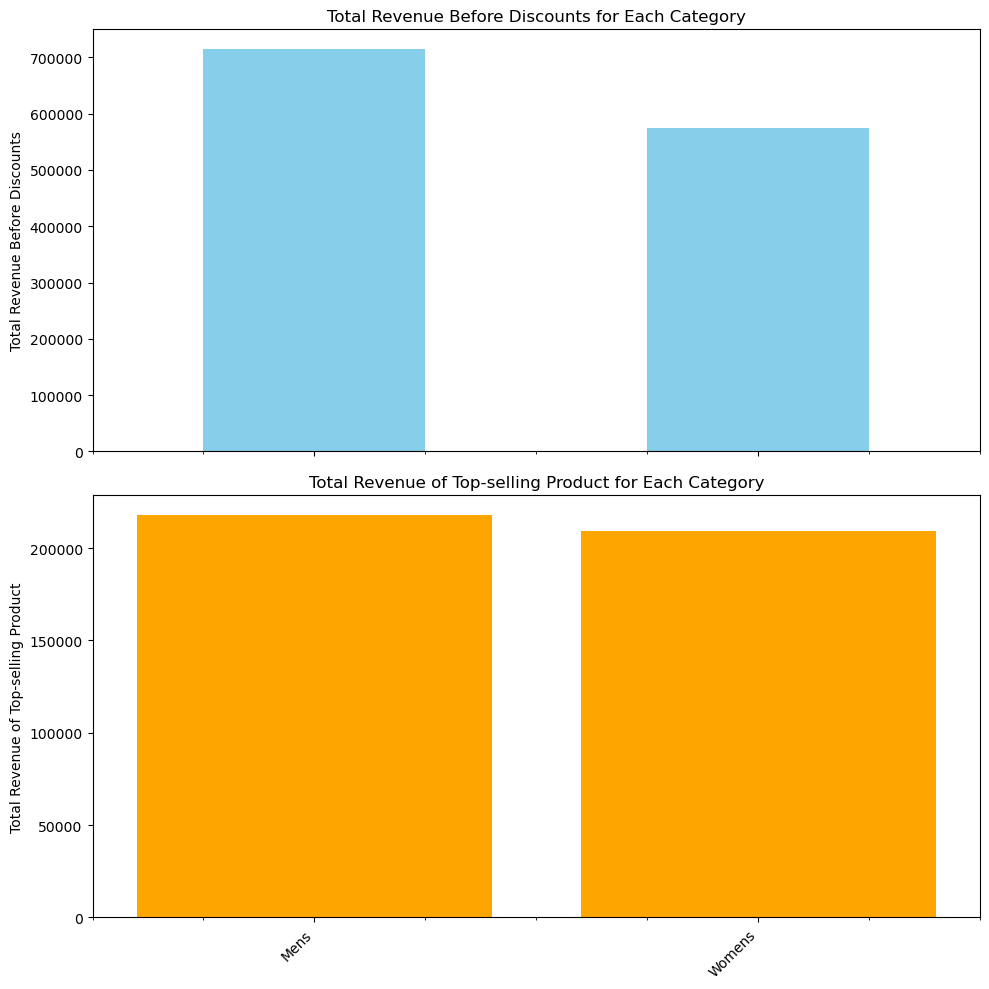

In [118]:
import matplotlib.pyplot as plt

# Create a figure and axis object with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot the total revenue before discounts for each category
category_totals = merged_df.groupby('category_name')['total_revenue_before_discounts'].sum()
category_totals.plot(kind='bar', color='skyblue', ax=ax1, label='Total Revenue Before Discounts')
ax1.set_ylabel('Total Revenue Before Discounts')
ax1.set_title('Total Revenue Before Discounts for Each Category')

# Plot the total revenue of the top-selling product for each category
for idx, row in top_selling_products.iterrows():
    ax2.bar(row['category_name'], row['total_revenue_before_discounts'], color='orange', label=f'Top-selling Product: {row["product_id"]}')
ax2.set_ylabel('Total Revenue of Top-selling Product')
ax2.set_title('Total Revenue of Top-selling Product for Each Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### 6.What is the percentage split of revenue by product for each segment?

In [119]:
# Group by 'segment_name' and 'product_id', calculate the sum of revenue for each product within each segment
product_totals = merged_df.groupby(['segment_name', 'product_id']).agg({
    'total_revenue_before_discounts': 'sum'
}).reset_index()

# Calculate the total revenue for each segment
segment_totals = merged_df.groupby('segment_name')['total_revenue_before_discounts'].sum().reset_index()

# Merge the product and segment totals
merged_totals = pd.merge(product_totals, segment_totals, on='segment_name', suffixes=('_product', '_segment'))

# Calculate the percentage split
merged_totals['percentage_split'] = (merged_totals['total_revenue_before_discounts_product'] / merged_totals['total_revenue_before_discounts_segment']) * 100

print(merged_totals[['segment_name', 'product_id', 'percentage_split']])


   segment_name product_id  percentage_split
0        Jacket     72f5d4         19.451310
1        Jacket     9ec847         57.033705
2        Jacket     d5e9a6         23.514986
3         Jeans     c4a632         24.059515
4         Jeans     e31d39         17.792177
5         Jeans     e83aa3         58.148308
6         Shirt     2a2353         53.597624
7         Shirt     5d267b         37.425242
8         Shirt     c8d436          8.977134
9         Socks     2feb6b         35.499404
10        Socks     b9a74d         20.175208
11        Socks     f084eb         44.325388


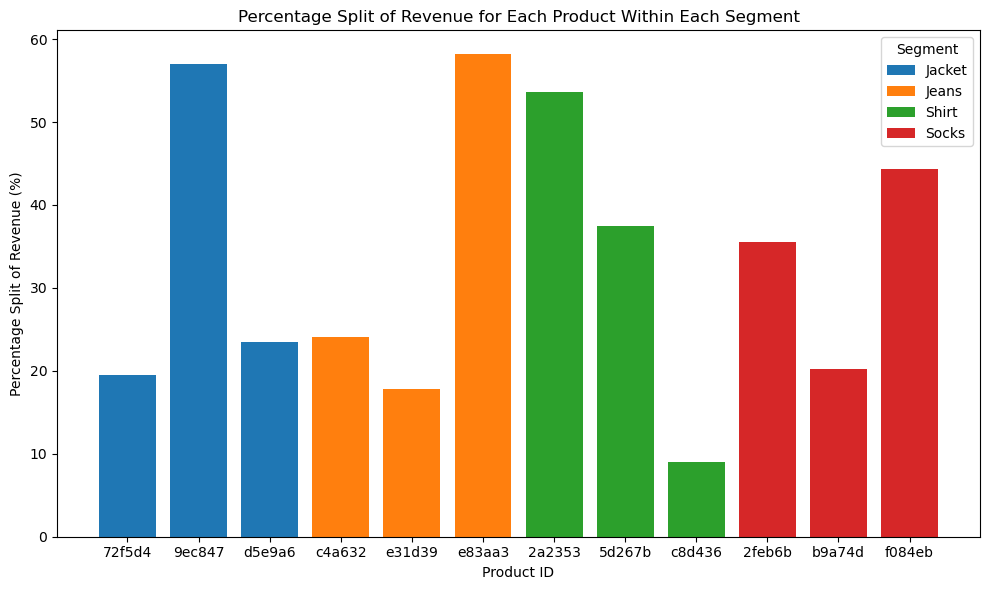

In [120]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Grouped bar plot for percentage split of revenue for each product within each segment
for segment_name, group in merged_totals.groupby('segment_name'):
    ax.bar(group['product_id'], group['percentage_split'], label=segment_name)

# Add labels and title
ax.set_xlabel('Product ID')
ax.set_ylabel('Percentage Split of Revenue (%)')
ax.set_title('Percentage Split of Revenue for Each Product Within Each Segment')

# Add legend
ax.legend(title='Segment')

# Show the plot
plt.tight_layout()
plt.show()


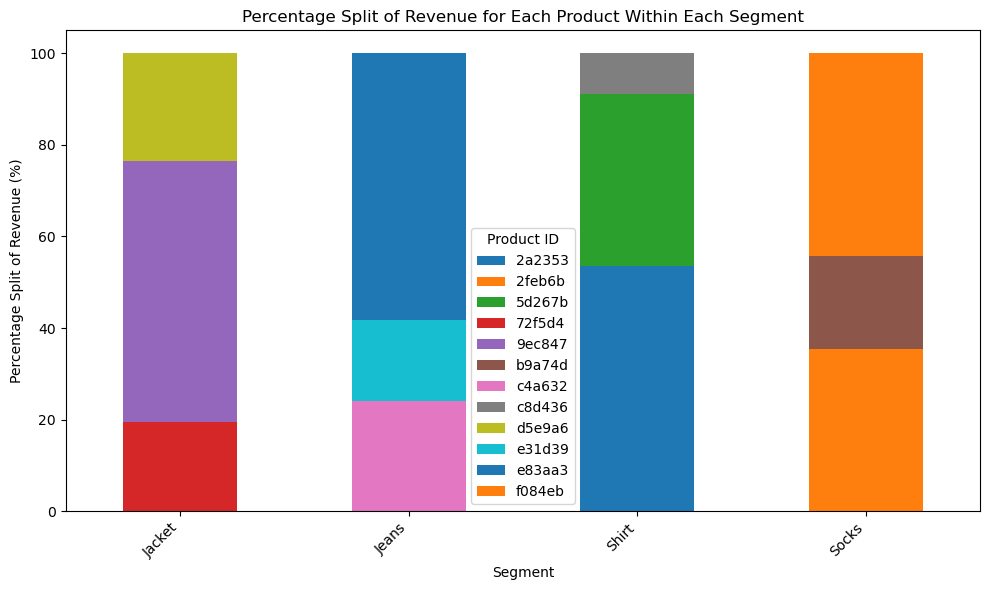

In [121]:
import matplotlib.pyplot as plt

# Pivot the merged_totals DataFrame to have product IDs as columns
pivot_table = merged_totals.pivot(index='segment_name', columns='product_id', values='percentage_split')

# Create a stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Segment')
plt.ylabel('Percentage Split of Revenue (%)')
plt.title('Percentage Split of Revenue for Each Product Within Each Segment')

# Add legend
plt.legend(title='Product ID')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 7.What is the percentage split of revenue by segment for each category?

In [122]:
segment_totals = merged_df.groupby(['category_name', 'segment_name']).agg({
    'total_revenue_before_discounts': 'sum'
}).reset_index()

# Calculate the total revenue for each category
category_totals = merged_df.groupby('category_name')['total_revenue_before_discounts'].sum().reset_index()

# Merge the segment and category totals
merged_totals = pd.merge(segment_totals, category_totals, on='category_name', suffixes=('_segment', '_category'))

# Calculate the percentage split
merged_totals['percentage_split'] = (merged_totals['total_revenue_before_discounts_segment'] / merged_totals['total_revenue_before_discounts_category']) * 100

print(merged_totals[['category_name', 'segment_name', 'percentage_split']])

  category_name segment_name  percentage_split
0          Mens        Shirt         56.873215
1          Mens        Socks         43.126785
2        Womens       Jacket         63.786190
3        Womens        Jeans         36.213810


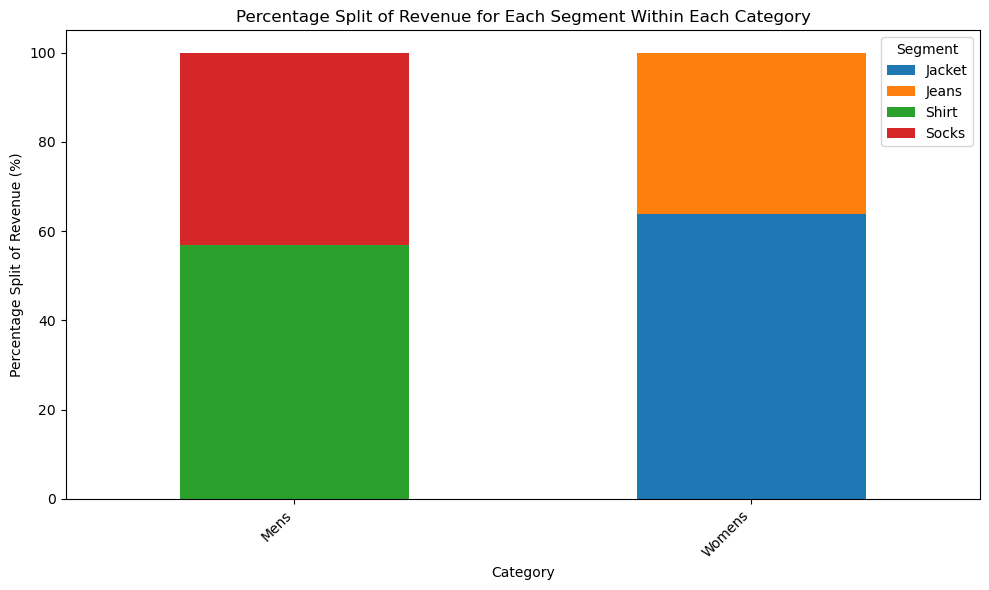

In [123]:
# Pivot the merged_totals DataFrame to have segment names as columns
pivot_table = merged_totals.pivot(index='category_name', columns='segment_name', values='percentage_split')

# Create a stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage Split of Revenue (%)')
plt.title('Percentage Split of Revenue for Each Segment Within Each Category')

# Add legend
plt.legend(title='Segment')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


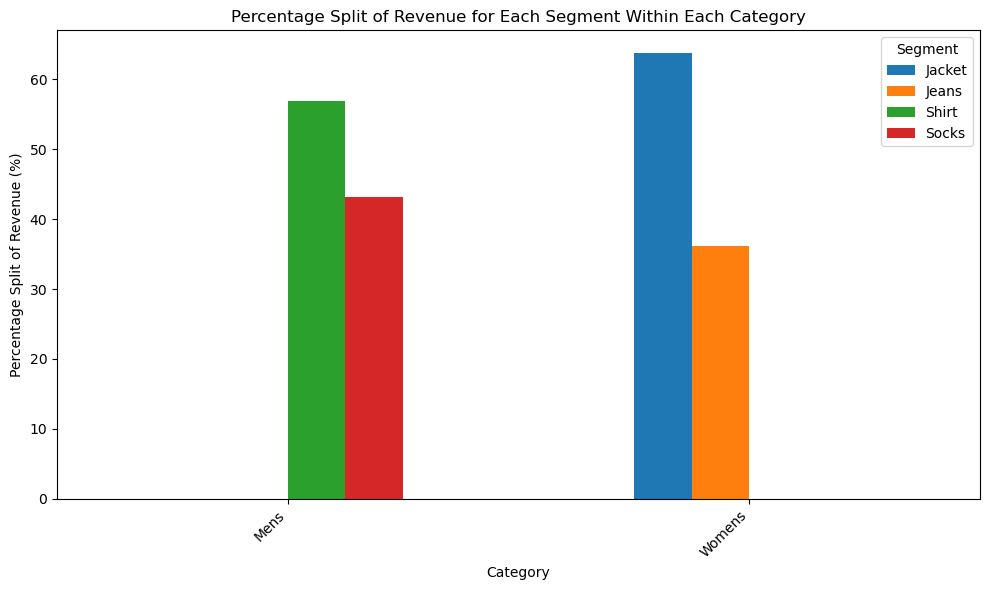

In [124]:
import matplotlib.pyplot as plt

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
merged_totals.groupby(['category_name', 'segment_name'])['percentage_split'].sum().unstack().plot(kind='bar', ax=ax)

# Add labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Percentage Split of Revenue (%)')
ax.set_title('Percentage Split of Revenue for Each Segment Within Each Category')

# Add legend
ax.legend(title='Segment')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### 8.What is the percentage split of total revenue by category?

In [125]:
# Group by 'category_name' and calculate the sum of total revenue before discounts for each category
category_totals = merged_df.groupby('category_name')['total_revenue_before_discounts'].sum().reset_index()

# Calculate the total revenue for the entire dataset
total_revenue = merged_df['total_revenue_before_discounts'].sum()

# Calculate the percentage split
category_totals['percentage_split'] = (category_totals['total_revenue_before_discounts'] / total_revenue) * 100

print(category_totals[['category_name', 'percentage_split']])


  category_name  percentage_split
0          Mens         55.381623
1        Womens         44.618377


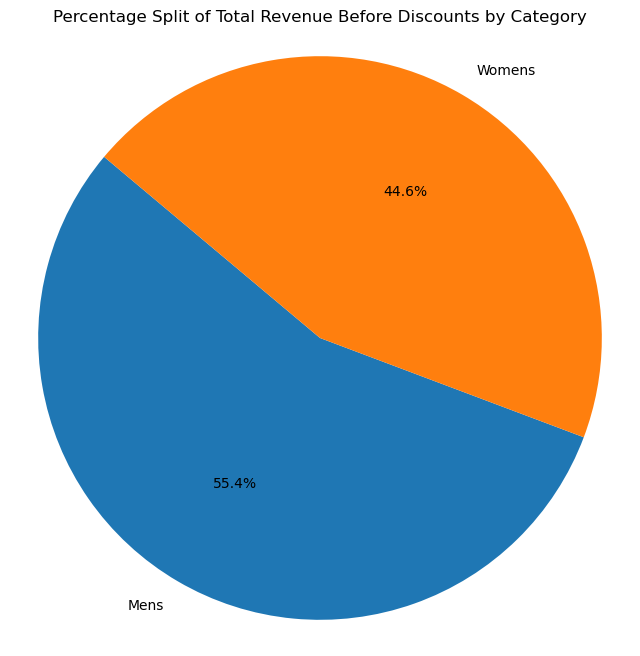

In [126]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_totals['percentage_split'], labels=category_totals['category_name'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Split of Total Revenue Before Discounts by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### 9.What is the total transaction “penetration” for each product? (hint: penetration = number of transactions where at least one quantity of a product was purchased divided by total number of transactions)

In [136]:

transaction_penetration = merged_df.groupby('product_name')['qty'].apply(lambda x: (x > 0).sum() / len(x)).sort_values(ascending=False)
print("\nTotal transaction 'penetration' for each product:")
print(transaction_penetration)



Total transaction 'penetration' for each product:
product_name
Black Straight Jeans - Womens       1.0
Blue Polo Shirt - Mens              1.0
Cream Relaxed Jeans - Womens        1.0
Grey Fashion Jacket - Womens        1.0
Indigo Rain Jacket - Womens         1.0
Khaki Suit Jacket - Womens          1.0
Navy Oversized Jeans - Womens       1.0
Navy Solid Socks - Mens             1.0
Pink Fluro Polkadot Socks - Mens    1.0
Teal Button Up Shirt - Mens         1.0
White Striped Socks - Mens          1.0
White Tee Shirt - Mens              1.0
Name: qty, dtype: float64


### Q10: Most common combination of at least 1 quantity of any 3 products in a single transaction


In [135]:
common_combination = merged_df.groupby('txn_id')['product_name'].apply(lambda x: frozenset(x)).value_counts().idxmax()
print("\nMost common combination of at least 1 quantity of any 3 products in a single transaction:")
print(list(common_combination))


Most common combination of at least 1 quantity of any 3 products in a single transaction:
['Navy Solid Socks - Mens', 'Navy Oversized Jeans - Womens', 'Cream Relaxed Jeans - Womens', 'Grey Fashion Jacket - Womens', 'Black Straight Jeans - Womens', 'Teal Button Up Shirt - Mens', 'White Tee Shirt - Mens', 'Pink Fluro Polkadot Socks - Mens']
